In [ ]:
# Import our favorite libraries and modules
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import pandas as pd
from scipy import signal
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


In [198]:
# kaggle dataset Url: https://www.kaggle.com/datasets/nnair25/Alcoholics
#loading whole datasetf
filenames_list = os.listdir(r"C:\dina\Computational neuroscience course\proj.8\Alcoholism\SMNI_CMI_TRAIN\Train") ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file

for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv("C:/dina/Computational neuroscience course/proj.8/Alcoholism/SMNI_CMI_TRAIN/Train/" + file_name) ## read from the file to df
    EEG_data = pd.concat([EEG_data,temp_df]) ## add the file data to the main df

"C:\dina\Computational neuroscience course\proj.8\Alcoholism\SMNI_CMI_TEST\Test"

100%|██████████| 468/468 [01:13<00:00,  6.41it/s]


'C:\\dina\\Computational neuroscience course\\proj.8\\Alcoholism\\SMNI_CMI_TEST\\Test'

In [199]:
#clarified info: 12 trials were done by 39 subjects and each trial was recorded by 64 channels while sampling 256 times in 1 second(each epoch lasted 3.9 msec) 
#frequency mentioned in data info.: 256 Hz (3.9-msec epoch) for 1 second
fr = 256
n_channels = 64
total_time = 60 # for each trial per subject
sample_num = 256
samp_range = np.arange(0, sample_num)

In [200]:
transposed_df_list = []

for group_df in tqdm(EEG_data.groupby(['name', 'trial number', 'matching condition', 'channel', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]
    transposed_df_list.append(_df)
    
df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)
df.head(3)

100%|██████████| 29952/29952 [00:37<00:00, 803.71it/s] 


,name,trial number,matching condition,sensor position,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
0,co2a0000364,0,S1 obj,0,a,-8.921,-8.433,-2.574,5.239,11.587,...,10.610,8.169,4.751,2.797,2.797,3.286,3.774,4.262,5.727,8.169
1,co2a0000364,0,S1 obj,1,a,0.834,3.276,5.717,7.670,9.623,...,12.065,15.483,12.553,5.229,-2.584,-6.490,-4.049,2.787,9.623,13.041
2,co2a0000364,0,S1 obj,2,a,-19.847,-12.522,1.149,14.821,20.681,...,19.216,17.751,10.915,2.126,-4.222,-4.710,0.661,7.009,11.403,12.868


In [201]:
df_Org = df.drop(['name'], axis=1)
df_Org = df_Org.drop(['trial number'], axis=1)
df_Org = df_Org.drop(['matching condition'], axis=1)

In [202]:
df_Org.head(3)


,sensor position,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
0,0,a,-8.921,-8.433,-2.574,5.239,11.587,14.028,11.587,6.704,...,10.610,8.169,4.751,2.797,2.797,3.286,3.774,4.262,5.727,8.169
1,1,a,0.834,3.276,5.717,7.670,9.623,9.623,8.647,5.229,...,12.065,15.483,12.553,5.229,-2.584,-6.490,-4.049,2.787,9.623,13.041
2,2,a,-19.847,-12.522,1.149,14.821,20.681,17.263,8.962,0.173,...,19.216,17.751,10.915,2.126,-4.222,-4.710,0.661,7.009,11.403,12.868


In [204]:
alcoholic = (df_Org[df_Org['subject identifier'] == 'a'])
alcoholic = alcoholic.drop(['subject identifier'], axis=1)
control = (df_Org[df_Org['subject identifier'] == 'c'])
control = control.drop(['subject identifier'], axis=1)
control.head(3)

,sensor position,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
15040,0,3.082,2.594,2.106,2.106,3.571,4.547,4.547,3.082,0.641,...,6.012,4.547,4.547,5.524,6.500,6.989,6.012,5.524,4.059,4.059
15041,1,-5.056,-6.521,-6.032,-4.079,-0.661,1.292,1.780,-0.173,-1.638,...,4.710,2.757,3.245,5.198,7.151,8.128,7.151,6.175,4.222,3.733
15042,2,16.449,14.496,10.101,6.195,6.195,8.148,10.101,9.125,5.707,...,5.707,3.754,3.265,3.265,4.242,5.219,6.195,7.172,7.172,6.195


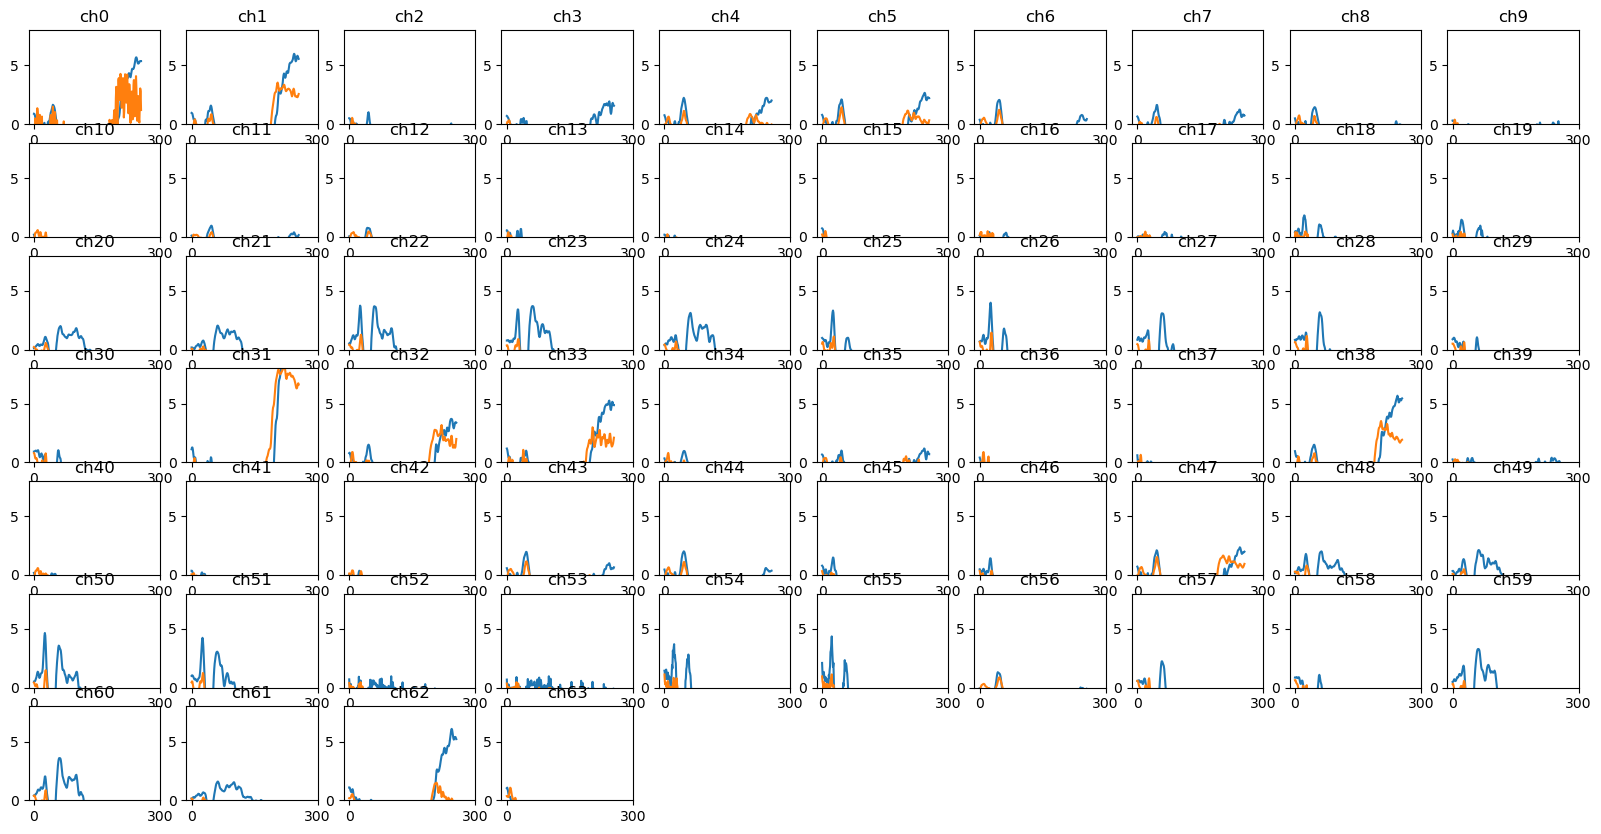

In [207]:
#plotting the mean amplitude for allcoholics and controls per channel
plt.figure(figsize=(20, 10))
for j in range(64):
  ax = plt.subplot(7, 10, j+1)
  plt.plot(samp_range, (control[control['sensor position']==j].mean(axis=0))[1:258])
  plt.plot(samp_range, (alcoholic[alcoholic['sensor position']==j].mean(axis=0))[1:258])
  plt.title('ch%d'%j)
  plt.xticks([0, 300])
  plt.ylim([0, 8])
plt.show()

In [208]:
# according to the plot above, we are choosing only one channel for simplicity
con_1ch= (control[control['sensor position']==33])[1:258].mean(axis=0)
alc_1ch= (alcoholic[alcoholic['sensor position']==33])[1:258].mean(axis=0)
con_1ch= con_1ch.drop(['sensor position'], axis=0)
con_1ch = con_1ch.T
alc_1ch= alc_1ch.drop(['sensor position'], axis=0)
alc_1ch = alc_1ch.T


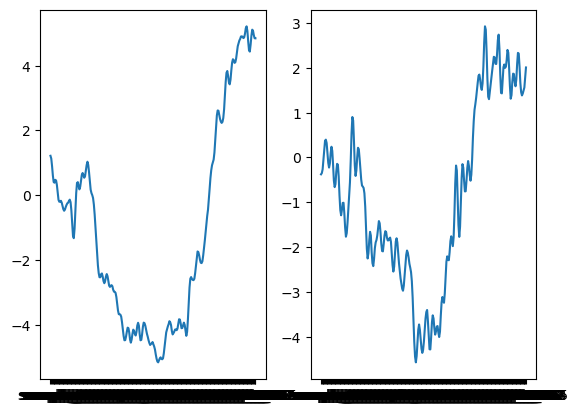

In [209]:
plt.subplot(1,2,1)
plt.plot(con_1ch)

plt.subplot(1,2,2)
plt.plot(alc_1ch)

C:\Users\dinak\AppData\Local\Temp\ipykernel_16996\72328723.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  Pxx, freqs, bins, im = plt.specgram(con_1ch,NFFT=2**8,noverlap=2**8-10,Fs=fs)


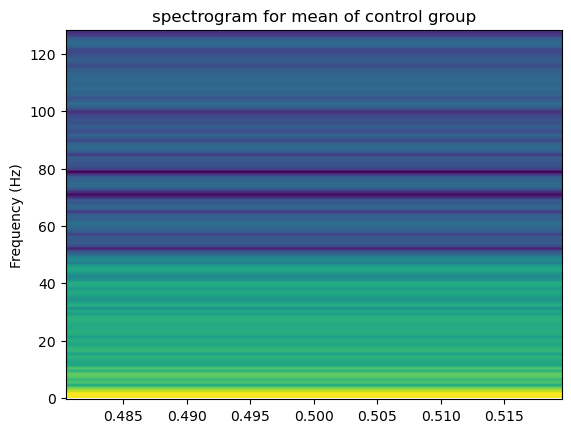

C:\Users\dinak\AppData\Local\Temp\ipykernel_16996\72328723.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  Pxx2, freqs2, bins2, im2 = plt.specgram(alc_1ch,NFFT=2**8,noverlap=2**8-10,Fs=fs)


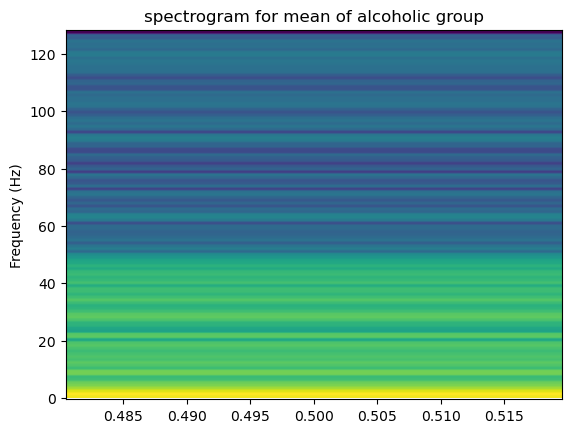

In [211]:
fs = 256
plt.title('spectrogram for mean of control group')
Pxx, freqs, bins, im = plt.specgram(con_1ch,NFFT=2**8,noverlap=2**8-10,Fs=fs)
plt.pcolormesh(bins, freqs, 10*np.log10(Pxx))
plt.ylabel('Frequency (Hz)')
plt.show()

plt.title('spectrogram for mean of alcoholic group')
Pxx2, freqs2, bins2, im2 = plt.specgram(alc_1ch,NFFT=2**8,noverlap=2**8-10,Fs=fs)
plt.pcolormesh(bins2, freqs2, 10*np.log10(Pxx2))
plt.ylabel('Frequency (Hz)')
plt.show()

CNN training

In [212]:
# import libraries
import numpy as np
import os #operation system
import pickle
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tnrange, tqdm_notebook
from IPython import display
import time
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import models, layers, activations
from keras.models import Model
from PIL import Image, ImageFilter
from keras import regularizers

In [213]:
df_Org2 = df_Org.drop(['sensor position'], axis=1)


In [214]:
from sklearn.model_selection import train_test_split
label = df_Org2.iloc[:,0]
df_Org3 = df_Org2.iloc[:, 1:]
label.loc[label=="a"]=1.0
label.loc[label=="c"]=0.0

X_train, X_test, y_train, y_test = train_test_split(df_Org3, label)
n_classes = 2
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")


#df_Org3_see = df_Org3.to_numpy

#print(type(df_Org3_see))
df_Org3_see = df_Org3
#df_Org3_see.iloc[:,-1] = np.nan 
#df_Org3_see = df_Org3_see.add (df_Org3_see, axis= 2, level=None, fill_value=None)
x_train = (X_train.values.reshape(-1, 256, X_train.shape[0]).transpose(2, 1, 0) / 255.)
x_test = (X_test.values.reshape(-1, 256, X_test.shape[0]).transpose(2, 1, 0) / 255.)
df_Org3_see = (df_Org3_see.values.reshape(-1, 256, 29952).transpose(2, 1, 0) / 255.)


X_test.shape


C:\Users\dinak\AppData\Local\Temp\ipykernel_16996\607470813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label.loc[label=="a"]=1.0
C:\Users\dinak\AppData\Local\Temp\ipykernel_16996\607470813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label.loc[label=="c"]=0.0


(7488, 256)

In [215]:
X_test.shape[0]

7488

In [216]:
data_size_in = df_Org3_see.shape
data_size_in = (256, 1)

In [217]:
# Define your network builder function. You can assume the (32, 32, 3) input size.
def build_neural_network(data_size_in, n_classes):

    inputs = layers.Input(shape=data_size_in)
    network_1 = layers.Conv1D(32, kernel_size=(3), activation='relu')(inputs)
    network_2 = layers.MaxPool1D(pool_size=(2))(network_1)
    network_3 = layers.Conv1D(64, kernel_size=(3), activation='relu')(network_2)
    network_4 = layers.MaxPool1D(pool_size=(2))(network_3)
    network_5 = layers.Conv1D(128, kernel_size=(3), activation='relu')(network_4)
    network_6 = layers.MaxPool1D(pool_size=(2))(network_5)
    network_7 = layers.Flatten()(network_6)
    network_8 = layers.Dense(128, activation='relu')(network_7)
    network_9 = layers.Flatten()(network_8)
    prediction = layers.Dense(1, activation='sigmoid')(network_9)

    model = Model(inputs=inputs, outputs=prediction)
    print(model.summary())
    
    return model

In [222]:
# experimental setup
ls = 'BinaryCrossentropy' # define the (string) loss function
lr = 0.1 # pick a value for your learning rate
sgd = keras.optimizers.SGD(learning_rate=lr) # define Stochastic Gradient Descent as the keras optimizer, which takes the learning rate as input parameter
metric = ['acc'] # define (Python) list of metrics

network = build_neural_network(data_size_in, n_classes)
network.compile(loss=ls, optimizer=sgd, metrics=metric)

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 256, 1)]          0         
                                                                 
 conv1d_68 (Conv1D)          (None, 254, 32)           128       
                                                                 
 max_pooling1d_50 (MaxPoolin  (None, 127, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_69 (Conv1D)          (None, 125, 64)           6208      
                                                                 
 max_pooling1d_51 (MaxPoolin  (None, 62, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_70 (Conv1D)          (None, 60, 128)           247

In [223]:
# training phase
def train_network(network, x_training, y_training, x_validation, y_validation, n_epoch, batch_size, network_filepath):

    results = network.fit(x_training, y_training,validation_data=(x_validation, y_validation), batch_size=batch_size, epochs= n_epoch)
    pd.DataFrame(results.history).plot(figsize=(8,5))


Epoch 1/10
351/351 [==============================] - 5s 14ms/step - loss: 0.6302 - acc: 0.6544 - val_loss: 0.5648 - val_acc: 0.7099
Epoch 2/10
351/351 [==============================] - 4s 12ms/step - loss: 0.5195 - acc: 0.7467 - val_loss: 0.4719 - val_acc: 0.7751
Epoch 3/10
351/351 [==============================] - 8s 22ms/step - loss: 0.4005 - acc: 0.8264 - val_loss: 0.4287 - val_acc: 0.8084
Epoch 4/10
351/351 [==============================] - 9s 24ms/step - loss: 0.2838 - acc: 0.8870 - val_loss: 0.2762 - val_acc: 0.8897
Epoch 5/10
351/351 [==============================] - 10s 28ms/step - loss: 0.3538 - acc: 0.8608 - val_loss: 0.3763 - val_acc: 0.8431
Epoch 6/10
351/351 [==============================] - 10s 29ms/step - loss: 0.2251 - acc: 0.9099 - val_loss: 0.2145 - val_acc: 0.9204
Epoch 7/10
351/351 [==============================] - 8s 24ms/step - loss: 0.1949 - acc: 0.9320 - val_loss: 0.3901 - val_acc: 0.8567
Epoch 8/10
351/351 [==============================] - 11s 30ms/step

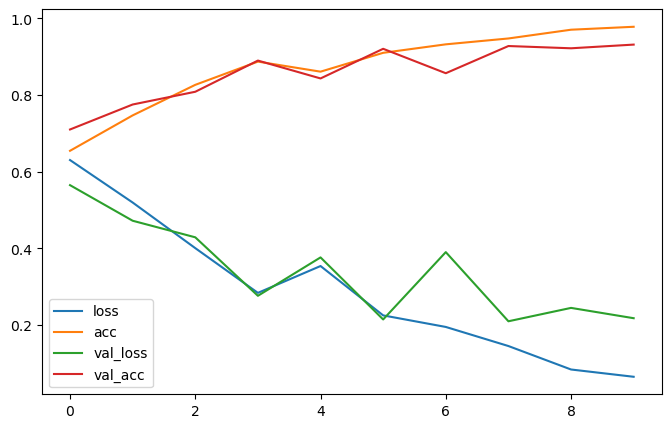

In [224]:
batch_size = 64
n_epoch = 10
file_dir = './'
network_filepath = os.path.join(file_dir, 'best_model_net_task_2.h5')

train_network(network, X_train, y_train,
              X_test, y_test, n_epoch, batch_size, network_filepath)